# movielens电影评分数据分析(上)

In [1]:
import numpy as np
import pandas as pd

## 读取数据

In [2]:
# 从用户表读取用户信息
users = pd.read_table('users.dat', header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], sep='::',engine='python')

In [3]:
# 打印列表长度，共有6040条记录
print(len(users))

6040


In [4]:
# 查看前五条记录
users.head(5)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
# 同样方法，导入电影评分表
ratings = pd.read_table('ratings.dat', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], sep='::',engine='python')
# 打印列表长度
print(len(ratings))
print(ratings.head(5))


1000209
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [8]:
# 同样方法，导入电影数据表
movies = pd.read_table('movies.dat', header=None, names=['MovieID', 'Title', 'Genres'], sep='::',engine='python')
print(len(movies))
print(movies.head(5))

3883
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


## 合并数据表

In [9]:
# 导入完成之后，我们可以发现这三张表类似于数据库中的表
# 要进行数据分析，我们就要将多张表进行合并才有助于分析 先将users与ratings两张表合并再跟movied合并
data = pd.merge(pd.merge(users, ratings), movies)
data.head(20)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,F,18,3,95825,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,M,1,10,48073,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,F,25,7,10023,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,F,25,1,14607,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,M,45,3,55421,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama


## 对数据初步描述分析

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
UserID        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
MovieID       1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Title         1000209 non-null object
Genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [11]:
data.describe()

,UserID,Age,Occupation,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,2.973831e+01,8.036138e+00,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.175198e+01,6.531336e+00,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,2.500000e+01,2.000000e+00,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,2.500000e+01,7.000000e+00,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,3.500000e+01,1.400000e+01,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,5.600000e+01,2.000000e+01,3.952000e+03,5.000000e+00,1.046455e+09


## 查看数据

In [12]:
# 合并后的每一条记录反映了每个人的年龄，职业，性别，邮编，电影ID，评分，时间戳，电影信息，电影分类等一系列信息
# 比如我们查看用户id为1的所有信息
data[data.UserID==1]

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1725,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2250,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
2886,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4201,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
5904,1,F,1,10,48067,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
8222,1,F,1,10,48067,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama
8926,1,F,1,10,48067,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama
10278,1,F,1,10,48067,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical
11041,1,F,1,10,48067,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical


## 查看每一部电影不同性别的平均评分并计算分歧差值，之后排序

### 步骤1：查看每一部电影不同性别的平均评分

#### 方法1：使用分组聚合进行组内计算

In [13]:
# 查看每一部电影不同性别的平均评分 data_gender接收
data_gender=data.groupby(['Title','Gender']).agg({'Rating':'mean'})
# data_gender.head()

Rating
Title                     Gender          
$1,000,000 Duck (1971)    F       3.375000
                          M       2.761905
'Night Mother (1986)      F       3.388889
                          M       3.352941
'Til There Was You (1997) F       2.675676

#### 方法2：创建数据透视表

In [15]:
# 查看每一部电影不同性别的平均评分 data_gender接收
data_gender=data.pivot_table(index='Title',columns='Gender',values='Rating',aggfunc='mean')
data_gender.head()

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


### 步骤2：增加分歧列

In [17]:
# 查看电影分歧最大的那部电影，在原数据中体现
data_gender['diff']=np.fabs(data_gender.F-data_gender.M)
data_gender.head()

Gender,F,M,diff
Title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,0.613095
'Night Mother (1986),3.388889,3.352941,0.035948
'Til There Was You (1997),2.675676,2.733333,0.057658
"'burbs, The (1989)",2.793478,2.962085,0.168607
...And Justice for All (1979),3.828571,3.689024,0.139547


In [18]:
# 男女电影分歧最大进行排序 data_gender_sorted接收
data_gender_sorted=data_gender.sort_values(by='diff',ascending=False)
data_gender_sorted.head()

Gender,F,M,diff
Title,,,
Tigrero: A Film That Was Never Made (1994),1.0,4.333333,3.333333
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.0,1.000000,3.000000
"Neon Bible, The (1995)",1.0,4.000000,3.000000
"James Dean Story, The (1957)",4.0,1.000000,3.000000
Country Life (1994),5.0,2.000000,3.000000


## 查看评分次数多的电影并进行排序 

In [19]:
# 查看评分次数多的电影并进行排序   data_rating_num接收
data_rating_num=data.groupby('Title').size()
data_rating_num.head()

Title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [20]:
#进行排序
data_rating_num_sorted=data_rating_num.sort_values(ascending=False)
data_rating_num_sorted.head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
dtype: int64

# movielens电影评分数据分析(下)

## 过滤掉评分条目数不足250条的电影

In [22]:
#过滤掉评分条目数不足250条的电影
hot_movies=data_rating_num[data_rating_num>250]
hot_movies.head()

Title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [24]:
#对评分数量进行排序，并取前20条数据
hot_movies_sorted=hot_movies.sort_values(ascending=False)
hot_movies_sorted.head(20)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

## 评分最高的十部电影


In [25]:
#评分最高的十部电影
movie_stats=data.groupby('Title').agg({'Rating':[np.size,np.mean]})
movie_stats.head()

Rating          
                                size      mean
Title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [27]:
atleast_100=movie_stats['Rating']['size']>=100
movie_stats[atleast_100].sort_values([('Rating','mean')],ascending=False)[:10]


Rating          
                                                     size      mean
Title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190

## 查看不同年龄的分布情况并且采用直方图进行可视化

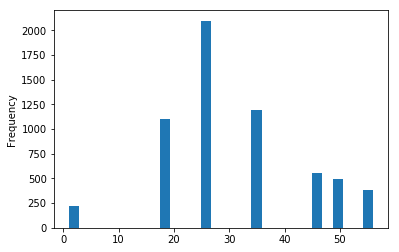

In [30]:
import matplotlib.pyplot as plt
users.Age.plot.hist(bins=30)
# plt.title("Distribution of users' ages")
# plt.ylabel('count of users')
# plt.xlabel('age');


## 在原数据中标记出用户位于的年龄分组

## 电影评分表中计算不同类型电影的频数

In [51]:
#对数据进行规整-movies


In [50]:
#删除level_1列，将columns为0的列重命名为genres,并重新定义数据框为movies_genres


In [49]:
#将原movies数据中的genres列替换成movies_genres，得到规整化处理后的movies数据 



In [48]:
#合并。构建电影评分数据集movie_ratings



In [47]:
#计算movies_ratings中不同类型电影的频数

